# **실습 1 : Auto Encoder/Denoise AE** 


## **Import Module**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models, utils

tf.__version__

'2.3.0'

## **DataSet**

### Load

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape[0], len(x_train)

11493376/11490434 [==============================] - 0s 0us/step


(60000, 60000)

### Preprocessing

(60000, 784)
(10000, 784)


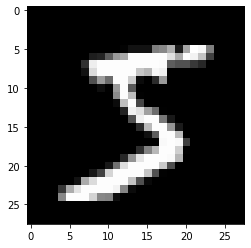

In [3]:
# Normalize
x_train, x_test = x_train/255., x_test/255.

# Dense layer 입력에 맞추어 shape 변환
# (60000,784) <- (60000,28,28)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# add noise 
# x_train = x_train + 0.3*np.random.randn(x_train.shape[0], 784)
# x_test = x_test + 0.3*np.random.randn(x_test.shape[0], 784)

# Print out the shape
print(x_train.shape)
print(x_test.shape)

plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

## **Model**

### Define

In [4]:
from tensorflow.keras import regularizers 

# Size of encoded representation
# 784 -> 32 : compression factor 24.5 
encoding_dim = 32

### Functional API ###
i_input = layers.Input(shape=(784,))

# Encoded representation of input image
encode_0 = layers.Dense(128, activation='sigmoid')(i_input)
encode_1 = layers.Dense(encoding_dim, activation='sigmoid')(encode_0)

# Decode is lossy reconstruction of input              
decoded_0 =  layers.Dense(128, activation='sigmoid')(encode_1)
decoded_1 =  layers.Dense(784, activation='sigmoid')(decoded_0)

In [5]:
# This autoencoder will map input to reconstructed output
autoencoder1 =  models.Model(inputs=i_input, outputs=decoded_1, name='ae-1')

In [6]:
# Select optimizer and loss function
autoencoder1.compile(optimizer='adam', loss='mse') 
autoencoder1.summary()

Model: "ae-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


### Fit

In [7]:
%%time
epoch_n = 100
batch_size_n = 512
### Model-1 ###
autoencoder1.fit(x_train, x_train,
                epochs=epoch_n,
                batch_size=batch_size_n,
                validation_freq=10,
                validation_data=(x_test, x_test))

Epoch 1/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0838
Epoch 2/100
118/118 [==============================] - 2s 16ms/step - loss: 0.0674
Epoch 3/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0661
Epoch 4/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0628
Epoch 5/100
118/118 [==============================] - 2s 16ms/step - loss: 0.0610
Epoch 6/100
118/118 [==============================] - 2s 16ms/step - loss: 0.0581
Epoch 7/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0549
Epoch 8/100
118/118 [==============================] - 2s 16ms/step - loss: 0.0512
Epoch 9/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0465
Epoch 10/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0430 - val_loss: 0.0413
Epoch 11/100
118/118 [==============================] - 2s 17ms/step - loss: 0.0408
Epoch 12/100
118/118 [==============================] - 2s 18ms/st

### Predict

In [8]:
decoded_imgs1 = autoencoder1.predict(x_test)

### Plot

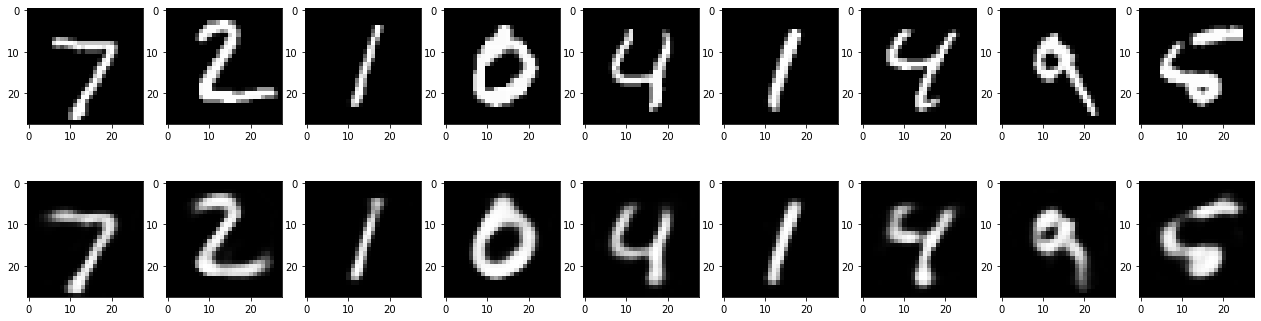

In [9]:
# use Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 9))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(3, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 1
    ax = plt.subplot(3, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs1[i].reshape(28,28)
    plt.imshow(reconstructed_img, cmap='gray')#, cmap='gray')

plt.show()

## **Analysis**

In [10]:
layer_outputs = [autoencoder1.layers[2].output]
fm_model = models.Model(inputs=autoencoder1.input, outputs=layer_outputs)
fm_model.summary()

feature_maps = fm_model.predict(x_train)
print(feature_maps.shape)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
Total params: 104,608
Trainable params: 104,608
Non-trainable params: 0
_________________________________________________________________
(60000, 32)


In [11]:
print(feature_maps[0])

[0.27658483 0.4806391  0.75289345 0.760389   0.19251591 0.18403083
 0.7498235  0.26523444 0.80222815 0.30977607 0.6709852  0.13324156
 0.41373613 0.55313474 0.33722532 0.24867079 0.7941343  0.3966512
 0.29277915 0.8789632  0.8580445  0.4212572  0.50783885 0.65802044
 0.38125136 0.45389816 0.72038215 0.32609615 0.49771923 0.5274822
 0.5782244  0.39184943]


In [12]:
d_input = layers.Input(shape=(encoding_dim))
decoded_0 =  layers.Dense(128, activation='sigmoid')(d_input)
decoded_1 =  layers.Dense(784, activation='sigmoid')(decoded_0)
autodecoder1 =  models.Model(inputs=d_input, outputs=decoded_1, name='ad-1')
autodecoder1.compile(optimizer='adam', loss='mse') 
autodecoder1.summary()

weights=autoencoder1.get_weights()
autodecoder1.set_weights(weights[4:])
print(weights[0].shape, weights[1].shape, weights[2].shape, weights[3].shape)

Model: "ad-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________________________
(784, 128) (128,) (128, 32) (32,)


In [13]:
feature_maps[0]

array([0.27658483, 0.4806391 , 0.75289345, 0.760389  , 0.19251591,
       0.18403083, 0.7498235 , 0.26523444, 0.80222815, 0.30977607,
       0.6709852 , 0.13324156, 0.41373613, 0.55313474, 0.33722532,
       0.24867079, 0.7941343 , 0.3966512 , 0.29277915, 0.8789632 ,
       0.8580445 , 0.4212572 , 0.50783885, 0.65802044, 0.38125136,
       0.45389816, 0.72038215, 0.32609615, 0.49771923, 0.5274822 ,
       0.5782244 , 0.39184943], dtype=float32)

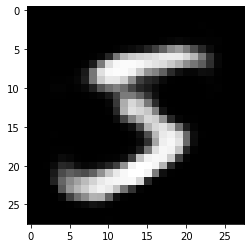

In [14]:
img = autodecoder1.predict([feature_maps[0].tolist()])
reconstructed_img = img.reshape(28,28)
plt.imshow(reconstructed_img, cmap='gray')

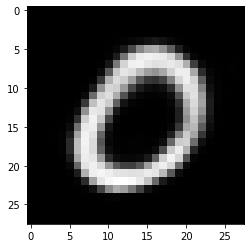

In [15]:
tarry = feature_maps[y_train==0]
tavg = tarry.mean(axis=0)
# tavg = tavg * [2.5,1.3,1.25,0.1]
tavg = [tavg.tolist()]

img = autodecoder1.predict(tavg)
reconstructed_img = img.reshape(28,28)
plt.imshow(reconstructed_img, cmap='gray')

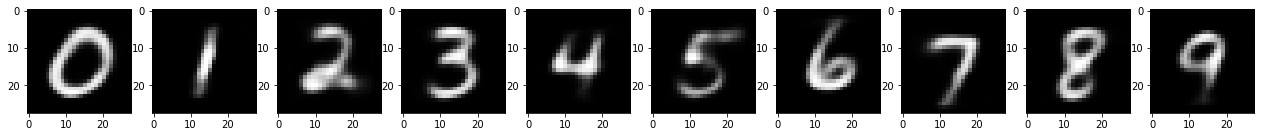

In [16]:
plt.figure(figsize=(22, 9))

for i in range(10):
  tarry = feature_maps[y_train==i]
  # print(tarry.shape)
  tavg = tarry.mean(axis=0)
  tavg = [tavg.tolist()]

  img = autodecoder1.predict(tavg)
  reconstructed_img = img.reshape(28,28)
  # plt.imshow(reconstructed_img, cmap='gray')#, cmap='gray')
  ax = plt.subplot(3, 10, i + 1 + 10)
  plt.imshow(reconstructed_img, cmap='gray')#, cmap='gray')

plt.show()